In [3]:
%load_ext autoreload
%autoreload 2

from ble import get_ble_controller
from base_ble import LOG
from cmd_types import CMD
import time
import numpy as np

LOG.propagate = False

from matplotlib import pyplot as plt
import random
import numpy as np

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [ ]:
# disconnect from Artemis
ble.disconnect()

In [324]:
# connect to Artemis
    
# Get ArtemisBLEController object
ble = get_ble_controller()

# Connect to the Artemis Device
ble.connect()

2023-05-12 16:06:55,413 | INFO     |: Looking for Artemis Nano Peripheral Device: C0:83:D5:66:86:3C
2023-05-12 16:06:57,949 | INFO     |: Connected to C0:83:D5:66:86:3C


In [122]:
# test sending and receiving

ble.send_command(CMD.PING, "")

s = ble.receive_string(ble.uuid['RX_STRING'])
print(s)

PONG


In [ ]:
# STATIC --- read and aggregate time, pitch, roll, yaw, TOF#1, TOF#2, leftPWM, rightPWM

def fft_callback(uuid, data):
    
    reading = (ble.bytearray_to_string(data)).split('|')
    #print(reading)
    
    for count in range(entries):
        try:
            nextPos = count*8
            time.append((reading[nextPos]))
            pitchC.append((reading[nextPos+1]))
            rollC.append((reading[nextPos+2]))
            yaw.append((reading[nextPos+3]))
            ONEDist.append((reading[nextPos+4]))
            TWODist.append((reading[nextPos+5]))
            leftPWM.append((reading[nextPos+6]))
            rightPWM.append((reading[nextPos+7]))
        except (IndexError,ValueError):
            continue
        
    
entries = 3
time = []
pitchC = []
rollC = []
yaw = []
ONEDist = []
TWODist = []
leftPWM = []
rightPWM = []

ble.start_notify(ble.uuid['RX_STRING'], fft_callback)
ble.send_command(CMD.TIMED_PID_DATA, "")

In [325]:
# ANGSPEED --- PID to given angular velocity and read and aggregate time, pitch, roll, yaw, TOF#1, TOF#2, leftPWM, rightPWM

def fft_callback(uuid, data):
    
    reading = (ble.bytearray_to_string(data)).split('|')
    #print(reading)
    
    for count in range(entries):
        try:
            nextPos = count*7
            time.append((reading[nextPos]))
            target.append((reading[nextPos+1]))
            error.append((reading[nextPos+2]))
            yaw.append((reading[nextPos+3]))
            ONEDist.append((reading[nextPos+4]))
            rawY.append((reading[nextPos+5]))
            speed.append((reading[nextPos+6]))
        except (IndexError,ValueError):
            continue
        
    
entries = 3
time = []
target = []
error = []
yaw = []
ONEDist = []
rawY = []
speed = []

ble.start_notify(ble.uuid['RX_STRING'], fft_callback)
ble.send_command(CMD.ANGSPEED, "3")

In [227]:
print(rawY)

['-1', '2', '16', '48', '54', '49', '40', '25', '24', '29', '28', '24', '40', '32', '31', '37', '29', '29', '36', '37', '32', '33', '25', '21', '21', '31', '29', '27', '23', '25', '38', '42', '42', '30', '20', '26', '34', '39', '31', '29', '26', '20', '32', '45', '44', '42', '34', '27', '39', '46', '39', '26', '35', '35', '25', '35', '39', '42', '40', '27', '34', '27', '16', '34', '48', '43', '38', '38', '39', '30', '34', '28', '38', '43', '39', '33', '28', '25', '23', '25', '36', '30', '40', '36', '37', '42', '40', '27', '30', '26', '20', '24', '12', '37', '41', '42', '38', '33', '34', '42', '29', '42', '23', '34', '36', '31', '40', '35', '37', '35', '31', '31', '31', '24', '15', '26', '40', '27', '23', '33', '20', '11', '20', '41', '37', '33', '26', '21', '23', '23', '19', '29', '21', '14', '16', '23', '16', '18', '30', '27', '28', '36', '35', '27', '11', '35', '39', '30', '26', '20', '19', '28', '23', '31', '31', '33', '41', '44', '43', '34', '26', '25', '26', '35', '32', '29', '28'

In [326]:
# stop notifications from this characteristic

ble.stop_notify(ble.uuid['RX_STRING'])

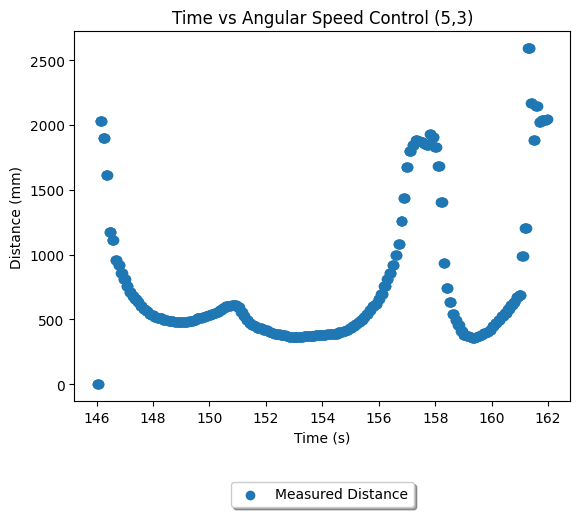

In [327]:
import random

# Collect all data points
intTarget = [eval(i) for i in target]
intError = [eval(i) for i in error]
intSpeed = [eval(i) for i in speed]

intTime = [eval(t)/1000 for t in time]

intAng = [eval(i) for i in rawY]
intYaw = [-eval(i) for i in yaw]

intDist = [eval(i) for i in ONEDist]

# Plot all graphs
plt.scatter(intTime, intDist, label = "Measured Distance")
#plt.scatter(intTime, intTarget, label = "Setpoint")
#plt.scatter(intTime, intAng, label = "Angular Speed")
#plt.scatter(intTime, intError, label = "Error")
#plt.scatter(intTime, intSpeed, label = "Speed")
#plt.scatter(intTime, intYaw, label = "Current Yaw")

plt.title("Time vs Angular Speed Control (5,3)")
plt.xlabel("Time (s)")
plt.ylabel("Distance (mm)")
plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.2),
          fancybox=True, shadow=True, ncol=5)

#plt.xlim((139,142))
#plt.ylim((-500,2000))

#n3n2, p5n3, p0p3, p5p3


In [ ]:
intTarget = [eval(i) for i in target]
intError = [eval(i) for i in error]
intSpeed = [eval(i) for i in speed]

intTime = [eval(t)/1000 for t in time]

intAng = [eval(i) for i in rawY]
intYaw = [-eval(i) for i in yaw]

intDist = [eval(i) for i in ONEDist]

In [328]:
p5p3_Target = intTarget
p5p3_Error = intError
p5p3_Speed = intSpeed

p5p3_Time = intTime

p5p3_Ang = intAng
p5p3_Yaw = intYaw

p5p3_Dist = intDist

In [329]:
%store p5p3_Target
%store p5p3_Error
%store p5p3_Speed

%store p5p3_Time

%store p5p3_Ang
%store p5p3_Yaw

%store p5p3_Dist

Stored 'p5p3_Target' (list)
Stored 'p5p3_Error' (list)
Stored 'p5p3_Speed' (list)
Stored 'p5p3_Time' (list)
Stored 'p5p3_Ang' (list)
Stored 'p5p3_Yaw' (list)
Stored 'p5p3_Dist' (list)


In [346]:
print(len(p5p3_Time))

1020
